In [ ]:
import torch
from torch import nn
import numpy as np
from matplotlib import pyplot as plt

torch.__version__

'2.0.1+cu118'

In [ ]:
# Allow access to google drive for working with images
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append("/content/drive/MyDrive/Colab_Notebooks/")

In [ ]:
# Setup device-agnoistc code
device = "cuda" if torch.cuda.is_available else "cpu"
device

'cuda'

In [ ]:
# Setting Random Seed for Reproducibility
RANDOM_SEED = 0

# Set seed for torch
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

In [ ]:
# Parameter for Augmentation
AUGMENTATION = True

# File Paths

In [ ]:
from pathlib import Path

# Setup path to data folder
data_path = Path("/content/drive/MyDrive/Colab_Notebooks/")
image_path = data_path / "melanoma_cancer_dataset"

# Setup Train and Testing Paths
train_dir = image_path / "train"
test_dir = image_path / "test"

# Visualize the train and test paths
train_dir, test_dir

(PosixPath('/content/drive/MyDrive/Colab_Notebooks/melanoma_cancer_dataset/train'),
 PosixPath('/content/drive/MyDrive/Colab_Notebooks/melanoma_cancer_dataset/test'))

# 2) Image Transformations

In [ ]:
from torchvision import datasets, transforms

# # TRAIN DATA TRANSFORMATIONS
# train_transform = transforms.Compose([
#     # 5% probability of random flip
#     transforms.RandomHorizontalFlip(p=0.05),
#     # 5% probability of random rotation
#     transforms.RandomApply([transforms.RandomRotation(degrees=(-10, 10))], p=0.05),
#     # 5% probability of a random colorjittter
#     transforms.RandomApply([transforms.ColorJitter(brightness=0.2,
#                                                    contrast=0.2,
#                                                    saturation=0.2,
#                                                    hue=0.2)], p=0.05),
#     # Resize the image
#     transforms.Resize(256),
#     transforms.CenterCrop(224),
#     # Turn Image into a torch.Tensor
#     transforms.ToTensor(),
#     # Normalize Values for AlexNet
#     transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                          std=[0.229, 0.224, 0.225])
    # ])

# Define Transformations for Test Data
# (No Data Augmentation)
test_transform = transforms.Compose([
    # Resize the image
    transforms.Resize(256),
    transforms.CenterCrop(224),
    # Turn Image into a torch.Tensor
    transforms.ToTensor(),
    # Normalize Values for AlexNet
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])



# 3) Defining Training, Validation, and, Testing Data

## A) Read and Transform the data

In [ ]:
from torch.utils.data import random_split

# Percentage Validation Data to Use for Training
VAL_PERC = 0.1

# # Load the training data
# train_data = datasets.ImageFolder(root=train_dir,
#                                   transform=train_transform,
#                                   target_transform=None)

# Load the testing data
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=test_transform,
                                 target_transform=None)

# # Determine size of validation and training data
# val_size = int(len(train_data) * VAL_PERC)
# train_size = len(train_data) - val_size

# # Split the Validation Data from the training data
# train_data, val_data = random_split(train_data, [train_size, val_size])

In [ ]:
# Check the length of the training and testing dataset
# print(f"Length of Train: {len(train_data)}")
# print(f"Length of Validation: {len(val_data)}")
print(f"Length of Test: {len(test_data)}")
print()
print(f"Dimensions of Tensorflow Image: {test_data[0][0].shape}")

Length of Test: 2000

Dimensions of Tensorflow Image: torch.Size([3, 224, 224])


# 4) Load data into data loader

In [ ]:
import os
# Define Batch Size and Num_workers
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

In [ ]:
# Turn the train and test datasets into dataloaders
from torch.utils.data import DataLoader

print(f"Creating DataLoaders with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

# train_dataloader = DataLoader(dataset=train_data,
#                               batch_size=BATCH_SIZE,
#                               num_workers=NUM_WORKERS,
#                               shuffle=True,
#                               drop_last=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=50,
                             num_workers=NUM_WORKERS,
                             shuffle=True)

# val_dataloader = DataLoader(dataset=val_data,
#                             batch_size=BATCH_SIZE,
#                             num_workers=NUM_WORKERS,
#                             shuffle=True,
#                             drop_last=True)

test_dataloader

Creating DataLoaders with batch size 32 and 4 workers.


# 5) Load the Model & Parameters

In [ ]:
# Model Name
MODEL_NAME = f"AlexNet_10_iter_Aug_True"

# The directory to store the model
models_dir = "/content/drive/MyDrive/Colab_Notebooks/models/"
file_path = models_dir + MODEL_NAME + ".pth"

In [ ]:
import torchvision.models as models

# Create an instance of the model
model_0 = models.alexnet(pretrained=False).to(device)
model_0.classifier[6] = torch.nn.Linear(4096, 1).to(device)

# Load the saved model state
model_0.load_state_dict(torch.load(file_path))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


<All keys matched successfully>

In [ ]:
model_0

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

# 6) Test Against Train Data

In [ ]:
from training_script import test as Test

# Define the loss function
loss_fn = loss_fn = nn.BCEWithLogitsLoss()

# Calculate the metrics for the model
# Calculate how well the model performed
loss, acc, TP, TN, FN, FP, y_probs, y_test = Test(model_0,
                                                test_dataloader,
                                                loss_fn,
                                                device)

print(f"Model had a Loss of: {loss}")
print(f"Model had an accuracy of: {acc}")
print(f"True Positive (TP): {TP}")
print(f"True Negative (TN): {TN}")
print(f"False Negative (FN): {FN}")
print(f"False Positive (FP): {FP}")

Model had a Loss of: 0.22403748910874127
Model had an accuracy of: 0.9075
True Positive (TP): 863
True Negative (TN): 952
False Negative (FN): 137
False Positive (FP): 48


In [ ]:
import pickle
# Save the predictions and labels using pickle
PRED_DIR = "/content/drive/MyDrive/Colab_Notebooks/predictions/"

with open(PRED_DIR + MODEL_NAME + "_PRED", "wb") as fp:
  pickle.dump(y_probs, fp)

with open(PRED_DIR + MODEL_NAME + "_TRUE", "wb") as fp:
  pickle.dump(y_test, fp)

In [ ]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F1 = (2*precision*recall) / (precision + recall)
accuracy = (TP + TN) / (TP + FN + TN + FP)
specificity = TN / (TN + FP)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {F1}")
print(f"Accuracy: {accuracy}")
print(f"Specificity: {specificity}")

Precision: 0.9473106476399561
Recall: 0.863
F1 Score: 0.9031920460491889
Accuracy: 0.9075
Specificity: 0.952


# 7) Grad-Cam Visualization

In [ ]:
index = 1079

## Import Grad-CAM Package

In [ ]:
try:
  from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
  from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
  from pytorch_grad_cam.utils.image import show_cam_on_image
except:
  !pip install grad-cam
  from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
  from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
  from pytorch_grad_cam.utils.image import show_cam_on_image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 35.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.8-py3-none-any.whl size=38247 sha256=e81a878d13d8ab2347b6a1808ea03ba036697c53e4ee8b866fa7d726b99c9ae1
  Stored in directory: /root/.cache/pip/wheels/f8/04/36/94ff3c8a4215826a21946b34c01180817e606989fdf53f7cd6
Successfully built grad-cam


## A) Prepare Visualization

In [ ]:
# Select a particular image to look at
img = test_data[index][0]
label = test_data[index][1]


# Select the model and which layer to look at
model = model_0
target_layer = [model.features[-1]]
input_tensor = img.unsqueeze(0)

# Construct the CAM object then use on many images
cam = GradCAM(model=model, target_layers=target_layer, use_cuda=True)
targets = None
grayscale_cam = cam(input_tensor=input_tensor,
                   targets=targets,
                   aug_smooth=True
                   )

# # Grayscale overlay
grayscale_cam = grayscale_cam[0, :]

# Preparing Original Input Image
rgb_img = img.squeeze(dim=0)

# Do so by dividing by making
# min 0 and max 1 for each channel
chanel1 = rgb_img[0,:,:]
chanel2 = rgb_img[1,:,:]
chanel3 = rgb_img[2,:,:]

rgb_img[0,:,:] = (chanel1 - torch.min(chanel1)) / (torch.max(chanel1) - torch.min(chanel1))
rgb_img[1,:,:] = (chanel2 - torch.min(chanel2)) / (torch.max(chanel2) - torch.min(chanel2))
rgb_img[2,:,:] = (chanel3 - torch.min(chanel3)) / (torch.max(chanel3) - torch.min(chanel3))

# Change Channel Arrangment and make numpy for imshow
rgb_img = img.squeeze(dim=0).permute(1,2,0).numpy().astype(np.float32)

# Generate the Visualization
visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

## B) Determine Prediction of the image

In [ ]:
# Get the class index dictionary
class_idx = test_data.class_to_idx
idx_class = {v: k for k, v in class_idx.items()}

# Perform a forward pass on a single image
model_0.eval()
with torch.inference_mode():
  pred = model_0(input_tensor.to(device))

pred_label = int(torch.round(torch.sigmoid(pred)).item())
# Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Ouput logits: \n{pred}\n")
print(f"Output prediction probabilities: \n{torch.sigmoid(pred)}\n")
print(f"Ouput prediction label: \n{torch.round(torch.sigmoid(pred))}\n")
print(f"Actual label: \n{label}")

Ouput logits: 
tensor([[3.9788]], device='cuda:0')

Output prediction probabilities: 
tensor([[0.9816]], device='cuda:0')

Ouput prediction label: 
tensor([[1.]], device='cuda:0')

Actual label: 
1


## C) Visualize the final image

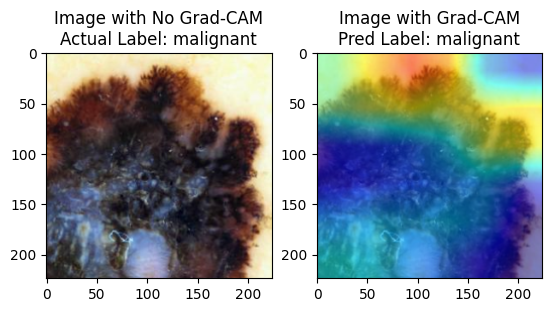

In [ ]:
fig, axs = plt.subplots(1, 2)

# Image 1 (No Grad-CAM)
true_label = idx_class[label]
axs[0].imshow(rgb_img)
axs[0].set_title("Image with No Grad-CAM\n" +
                 f"Actual Label: {true_label}")

# Image 2 (Grad-CAM)
pred_label = idx_class[pred_label]
axs[1].imshow(visualization)
axs[1].set_title("Image with Grad-CAM\n" +
                 f"Pred Label: {pred_label}")
plt.show()

PHOTOS_DIR = "/content/drive/MyDrive/Colab_Notebooks/photos"
fig.savefig(PHOTOS_DIR + "/" + MODEL_NAME + "_PHOTO_" + str(index) + ".png")